# Geometric Brownian Motion (GBM)

## Theoretical Concepts

A **Geometric Brownian Motion (GBM)**, also known as exponential Brownian motion, is a continuous-time stochastic process. In this process, the logarithm of a randomly varying quantity follows a Brownian motion, also known as a Wiener process, with drift. GBM is a crucial example of stochastic processes that satisfy a stochastic differential equation (SDE), notably used in mathematical finance to model stock prices in the Black–Scholes model.

### Technical Definition: The SDE

A stochastic process $S_{t}$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$$
dS_{t} = \mu S_{t} dt + \sigma S_{t} dW_{t}
$$

where $W_{t}$ is a Wiener process or Brownian motion, and $\mu$ (the percentage drift) and $\sigma$ (the percentage volatility) are constants. The drift models deterministic trends, while the volatility models unpredictable events during the motion.

### Solving the SDE

For an arbitrary initial value $S_{0}$, the SDE has the analytic solution (under Itô's interpretation):

$$
S_{t} = S_{0} \exp\left(\left(\mu - \frac{\sigma^{2}}{2}\right)t + \sigma W_{t}\right)
$$

The derivation requires the use of Itô calculus. Applying Itô's formula to $f(S) = \ln(S)$ gives:

$$
\begin{aligned}
d\ln(S) &= f'(S) dS + \frac{1}{2}f''(S)S^{2}\sigma^{2} dt\\
&= \frac{1}{S}(\sigma S dW_{t} + \mu S dt) - \frac{1}{2}\sigma^{2} dt\\
&= \sigma dW_{t} + (\mu - \frac{\sigma^{2}}{2}) dt.
\end{aligned}
$$

It follows that $E(\ln(S_{t})) = \ln(S_{0}) + (\mu - \frac{\sigma^{2}}{2})t$.

### Arithmetic Brownian Motion

The process $X_{t} = \ln\left(\frac{S_{t}}{S_{0}}\right)$, satisfying the SDE

$$
dX_{t} = \left(\mu - \frac{\sigma^{2}}{2}\right)dt + \sigma dW_{t}
$$

is known as Arithmetic Brownian Motion (ABM). This model was postulated by Louis Bachelier in 1900 for stock prices, representing the first attempt to model Brownian motion, now known as the Bachelier model. The ABM SDE can be obtained through the logarithm of a GBM via Itô's formula.

### Properties of GBM

The solution $S_{t}$ is a log-normally distributed random variable. The expected value and variance are given by:

$$
E(S_{t}) = S_{0}e^{\mu t},
$$

$$
\text{Var}(S_{t}) = S_{0}^{2}e^{2\mu t}\left(e^{\sigma^{2}t} - 1\right).
$$

These properties can be derived using the fact that $Z_{t} = \exp\left(\sigma W_{t} - \frac{1}{2}\sigma^{2}t\right)$ is a martingale.

## Simulated Paths and Distributions Visualization

This Python code generates and visualizes simulated paths for both Geometric Brownian Motion (GBM) and Arithmetic Brownian Motion (ABM). Additionally, it provides visualizations of the final time distributions for both processes.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.stats import norm, lognorm

In [3]:
NPaths = 500
NSteps = 500
T = 1
r = 0.05
sigma = 0.4
S_0 = 100

Takes parameters for the number of paths (NPaths), number of
steps (NSteps), time to maturity (T), risk-free rate (r),
volatility (sigma), and initial asset price (S_0).
It generates random paths for both GBM and ABM using the
given parameters and returns a dictionary containing the time grid,
ABM paths (X), and GBM paths (S).

In [4]:
np.random.seed(72)
Z = np.random.normal(0.0, 1.0, [NPaths, NSteps])
X = np.zeros([NPaths, NSteps+1])
time = np.zeros([NSteps+1])

X[:, 0] = np.log(S_0)

dt = T / float(NSteps)
for i in range(0, NSteps):
    # Standarize, make sure each column has mean 0 and variance 1
    if NPaths > 1:
        Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
    X[:, i+1] = X[:, i] + (r - 0.5 * sigma ** 2) * dt + sigma * np.power(dt, 0.5) * Z[:, i]
    time[i+1] = time[i] + dt

# Compute exponent of ABM
S = np.exp(X)
paths = {"time": time, "X": X, "S": S}

Plots the simulated paths for ABM and GBM on separate subplots.

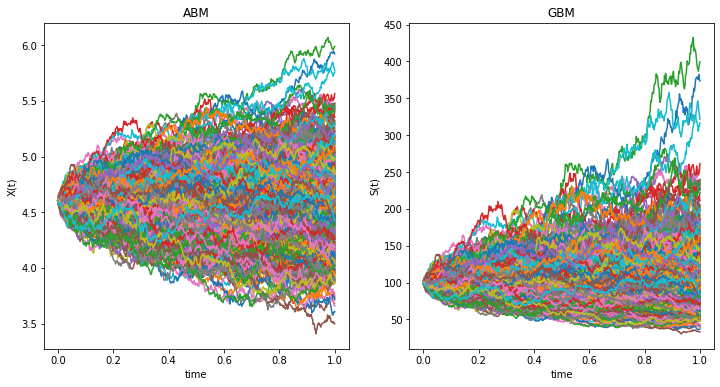

In [5]:
plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

# X(t)
ax1.plot(time, np.transpose(X))
ax1.set_xlabel("time")
ax1.set_ylabel("X(t)")
ax1.set_title("ABM")

# S(t)
ax2.plot(time, np.transpose(S))
ax2.set_xlabel("time")
ax2.set_ylabel("S(t)")
ax2.set_title("GBM")

plt.show()

Plots the final time distributions for both ABM and GBM.
It uses histograms for the distributions and overlays
the fitted probability density functions (PDFs) for
normal (ABM) and log-normal (GBM) distributions.

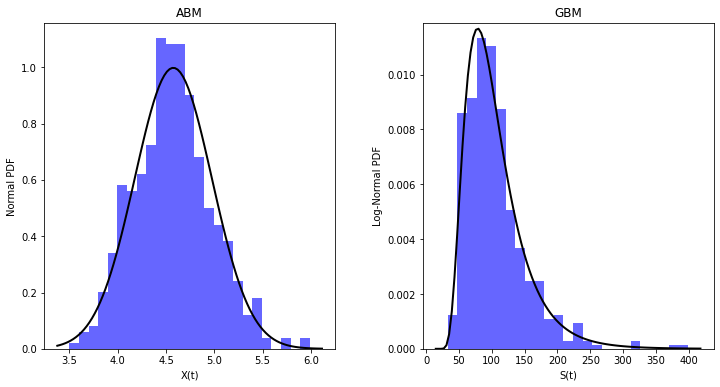

In [6]:
plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, wspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

ax1.hist(X[:, -1], bins=25, density=True, alpha=0.6, color='b') 

mu, std = norm.fit(X[:, -1])
xmin, xmax = ax1.get_xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 
ax1.plot(x, p, 'k', linewidth=2)

ax1.set_xlabel("X(t)")
ax1.set_ylabel("Normal PDF")
ax1.set_title("ABM")


ax2.hist(S[:, -1], bins=25, density=True, alpha=0.6, color='b')

ax2.set_ylim(bottom=0)
shape, loc, scale = lognorm.fit(S[:, -1])
xmin, xmax = ax2.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc=loc, scale=scale)
ax2.plot(x, p, 'k', linewidth=2)

ax2.set_xlabel("S(t)")
ax2.set_ylabel("Log-Normal PDF")
ax2.set_title("GBM")

plt.show()

## Stochastic Processes and Martingales

Setting the expected stock return equal to the risk-free rate $r$ is a foundational assumption that not only prevents arbitrage opportunities but also ensures that the stock price process exhibits the martingale property.

### Three Properties of a Martingale

1. **Martingale Property:** 
   $ E[X(t) \mid \mathcal{F}_s] = X(s) $
   The expected future value, given all available information up to time $s$, is equal to the current value.

2. **Adapted Process:**
   The process $X(t)$ is adapted to the filtration $\mathcal{F}_t$, meaning that its value at time $t$ depends only on the information available up to time $t$.

3. **Integrability:**
   The process $X(t)$ is integrable, ensuring that the expected value of $|X(t)|$ is finite for all $t$.
   
   
### Stochastic Processes

**Wiener Process**

- A Wiener process, denoted as $W(t)$, is a martingale.
  
- According to the Stochastic Integral Process Theorem, when integrated with any adapted process $g(t)$, i.e., $dX(t) = g(t)dW(t)$, the resulting process $X(t)$ is also a martingale.

**Stock Price**

- The stock price process, $S(t)$, is not a martingale because it typically includes a drift term. The drift introduces a deterministic component that violates the martingale property.

**Risk-Neutral Stochastic Process**

- However, when considering the ratio of a risk-neutral stochastic process, $S(t)/M(t)$, where $S$ is the stock price and $M(t)$ is the money saving account with $dM(t) = rM(t)dt$, this ratio becomes a martingale under the risk-neutral measure.





In [10]:
# Money Market process
M = lambda r, t: np.exp(r*t)

# Checking Martingales
print(f"A martingale should have constant {S_0} expected value")

ES = np.mean(S[:, -1])
print(f"   - Stock price has {round(ES, 2)} expected value, since it has a drift")

ESM = np.mean(S[:, -1]/M(r, T))
print(f"   - Risk-Neural Process has {round(ESM, 2)} expected value, so the process is a martingale if mu=r")

A martingale should have constant 100 expected value
   - Stock price has 105.45 expected value, since it has a drift
   - Risk-Neural Process has 100.31 expected value, so the process is a martingale if mu=r
